In [1]:
import os
import sys
#sys.path.insert(1, '../Src/')
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
from umap import UMAP
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

PATH_DATA = '../../Data/'

%matplotlib inline

In [2]:
fname = "stringer_spontaneous.npy"
fname =os.path.join(PATH_DATA,fname)

In [3]:
# @title Data loading
dat = np.load(fname, allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


# neural activity vs run

In [4]:
X = dat['sresp'].T
X.shape

(7018, 11983)

In [5]:
X[0]

array([ 2.9820833,  5.001608 ,  7.6890087, ..., 91.94794  ,  0.       ,
        1.1490179], dtype=float32)

In [6]:
y = dat['run']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train : ',X_train.shape)
print('Test  : ',X_test.shape)

Train :  (4912, 11983)
Test  :  (2106, 11983)


In [8]:
my_model_LR = LinearRegression()

In [9]:
my_model_LR.fit(X_train,y_train)

LinearRegression()

In [10]:
y_train_pred      = my_model_LR.predict(X_train)

metric_train_R2   = my_model_LR.score(X_train, y_train)
metric_train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)

print("metric_train_R2  :",metric_train_R2)
print("metric_train_RMSE:",metric_train_RMSE)


metric_train_R2  : 0.9999999999297017
metric_train_RMSE: 7.524206390190874e-05


In [11]:
y_test_pred      = my_model_LR.predict(X_test)

metric_test_R2   = my_model_LR.score(X_test, y_test)
metric_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print("metric_test_R2  :",metric_test_R2)
print("metric_test_RMSE:",metric_test_RMSE)


metric_test_R2  : 0.6900353055654738
metric_test_RMSE: 4.857080565908912


## temporal split

In [12]:
n = int(len(X)*0.3)

X_train = X[:-n]
y_train = y[:-n]
X_test  = X[-n:]
y_test  = y[-n:]
print('Train : ',X_train.shape)
print('Test  : ',X_test.shape)

Train :  (4913, 11983)
Test  :  (2105, 11983)


In [13]:
my_model_LR_2 = LinearRegression()
my_model_LR_2.fit(X_train,y_train)

LinearRegression()

In [14]:
y_train_pred      = my_model_LR_2.predict(X_train)

metric_train_R2   = my_model_LR_2.score(X_train, y_train)
metric_train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)

print("metric_train_R2  :",metric_train_R2)
print("metric_train_RMSE:",metric_train_RMSE)


metric_train_R2  : 0.9999999999260485
metric_train_RMSE: 6.538374209038597e-05


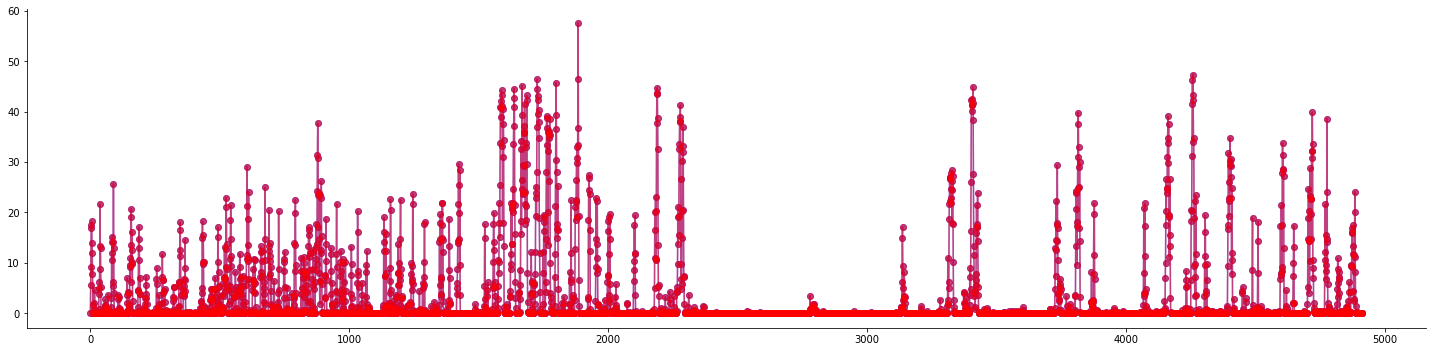

In [15]:
fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_train)),y_train,'-bo',alpha=0.5)
plt.plot(range(len(y_train_pred)),y_train_pred,'-ro',alpha=0.5)


In [16]:
y_test_pred      = my_model_LR_2.predict(X_test)

metric_test_R2   = my_model_LR_2.score(X_test, y_test)
metric_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print("metric_test_R2  :",metric_test_R2)
print("metric_test_RMSE:",metric_test_RMSE)


metric_test_R2  : 0.7701629839020971
metric_test_RMSE: 5.310470739370254


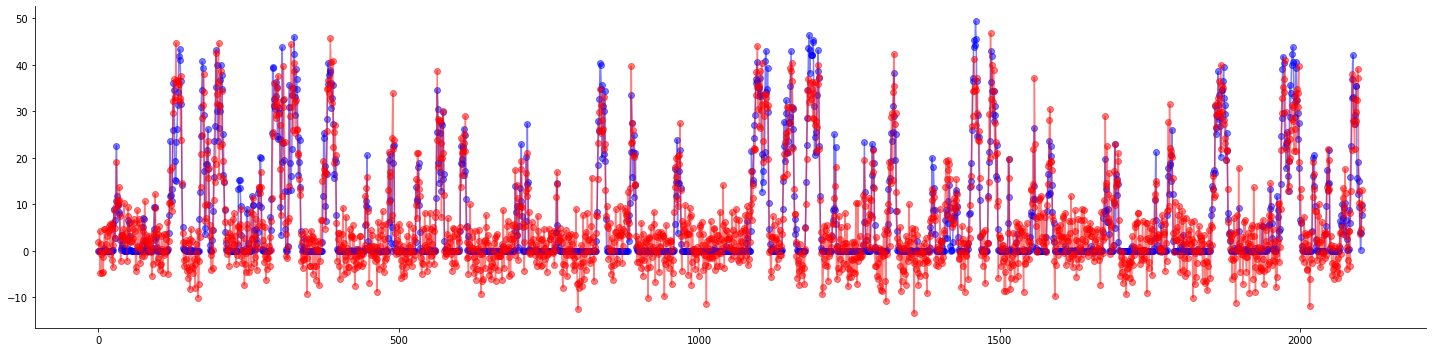

In [17]:
fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_test)),y_test,'-bo',alpha=0.5)
plt.plot(range(len(y_test_pred)),y_test_pred,'-ro',alpha=0.5)


# Filtering data

In [18]:
total_sresp = dat['sresp'].flatten()
for percentile in [25,50,75,90,100]:
    print('percentile'+str(percentile)+': ',np.percentile(total_sresp, percentile))

percentile25:  0.0
percentile50:  15.809068202972412
percentile75:  48.536081314086914
percentile90:  96.9262748718262
percentile100:  2417.7021484375


In [19]:
threshold = np.percentile(total_sresp, 75)
print('neural activity threshold',threshold)

neural activity threshold 48.536081314086914


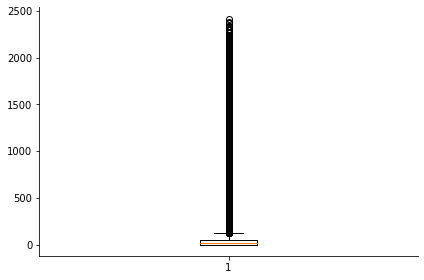

In [20]:
fig = plt.boxplot(X.flatten())

In [21]:
X_2 = X.copy()
X_2[X_2>threshold] = threshold

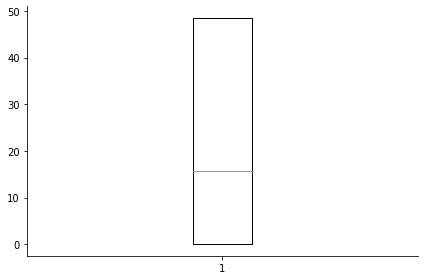

In [22]:
fig = plt.boxplot(X_2.flatten())

In [23]:
n = int(len(X_2)*0.3)

X_train = X_2[:-n]
y_train = y[:-n]
X_test  = X_2[-n:]
y_test  = y[-n:]
print('Train : ',X_train.shape)
print('Test  : ',X_test.shape)

Train :  (4913, 11983)
Test  :  (2105, 11983)


In [24]:
my_model_LR_4 = LinearRegression(positive=False)
my_model_LR_4.fit(X_train,y_train)

LinearRegression()

metric_train_R2  : 0.999999999990005
metric_train_RMSE: 2.196909835364599e-05


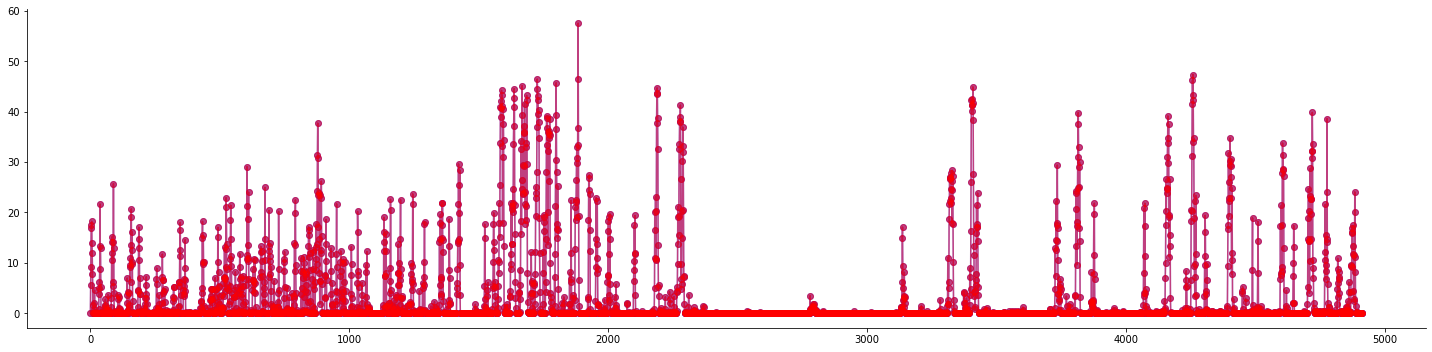

In [25]:
y_train_pred      = my_model_LR_4.predict(X_train) # metric_train_RMSE: 2.4037369030804003e-05


y_train_pred[y_train_pred<=0] = 0  # metric_train_RMSE: 2.196909835364599e-05


metric_train_R2   = my_model_LR_4.score(X_train, y_train)
metric_train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)

print("metric_train_R2  :",metric_train_R2)
print("metric_train_RMSE:",metric_train_RMSE)

fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_train)),y_train,'-bo',alpha=0.5)
plt.plot(range(len(y_train_pred)),y_train_pred,'-ro',alpha=0.5)


metric_test_R2  : 0.7181401187752845
metric_test_RMSE: 5.198912854725026


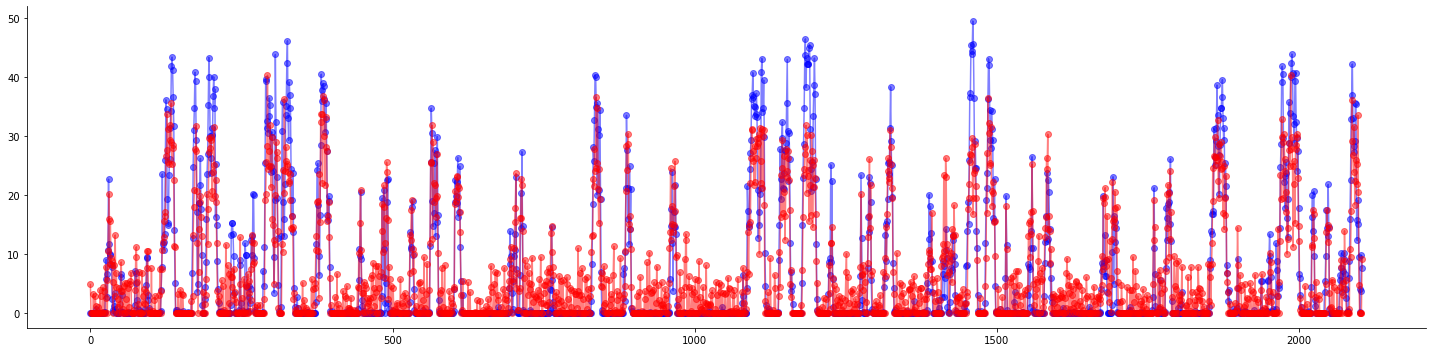

In [26]:
y_test_pred      = my_model_LR_4.predict(X_test) # metric_test_RMSE: 5.73526388441703

y_test_pred[y_test_pred<=0] = 0 #metric_test_RMSE: 5.5218955408988


metric_test_R2   = my_model_LR_4.score(X_test, y_test)
metric_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print("metric_test_R2  :",metric_test_R2)
print("metric_test_RMSE:",metric_test_RMSE)

fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_test)),y_test,'-bo',alpha=0.5)
plt.plot(range(len(y_test_pred)),y_test_pred,'-ro',alpha=0.5)


In [27]:
my_model_LR_3 = LinearRegression(positive=True)
my_model_LR_3.fit(X_train,y_train)

LinearRegression(positive=True)

metric_train_R2  : 0.7940169877808492
metric_train_RMSE: 3.1267633565389388


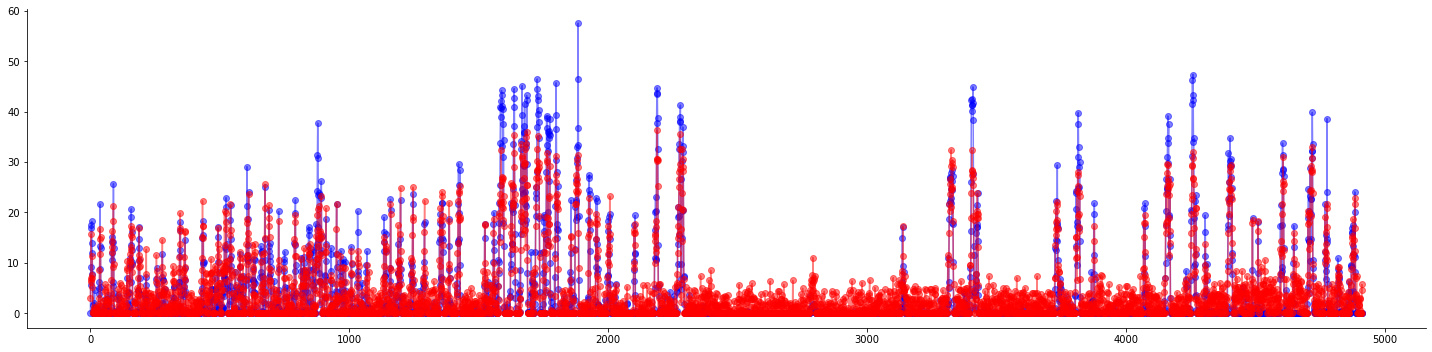

In [28]:
y_train_pred      = my_model_LR_3.predict(X_train) # metric_train_RMSE: 3.4507370216426407

y_train_pred[y_train_pred<=0] = 0  # metric_train_RMSE: 3.1267633565389388


metric_train_R2   = my_model_LR_3.score(X_train, y_train)
metric_train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)

print("metric_train_R2  :",metric_train_R2)
print("metric_train_RMSE:",metric_train_RMSE)

fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_train)),y_train,'-bo',alpha=0.5)
plt.plot(range(len(y_train_pred)),y_train_pred,'-ro',alpha=0.5)


metric_test_R2  : 0.731922265796407
metric_test_RMSE: 5.5218955408988


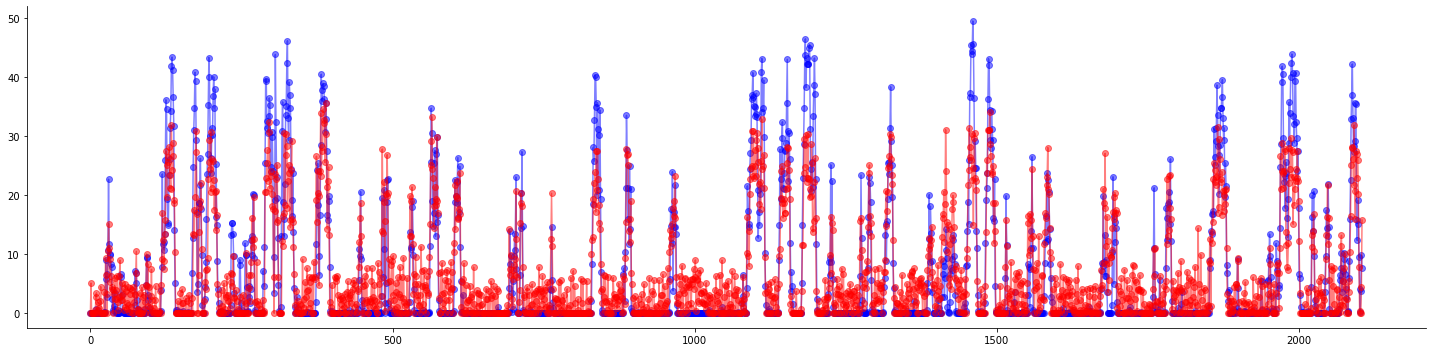

In [29]:
y_test_pred      = my_model_LR_3.predict(X_test) # metric_test_RMSE: 5.73526388441703

y_test_pred[y_test_pred<=0] = 0 #metric_test_RMSE: 5.5218955408988


metric_test_R2   = my_model_LR_3.score(X_test, y_test)
metric_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print("metric_test_R2  :",metric_test_R2)
print("metric_test_RMSE:",metric_test_RMSE)

fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_test)),y_test,'-bo',alpha=0.5)
plt.plot(range(len(y_test_pred)),y_test_pred,'-ro',alpha=0.5)
